<a href="https://colab.research.google.com/github/guerr3roxd/Challenge-Telecom-X-analisis-de-evasion-de-clientes/blob/main/desafio_telecom_x_alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importaciones

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

# Carga y normalización de datos

In [ ]:
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"
clientes = pd.read_json(url)

# Normalizar JSON anidados
df_customer = pd.json_normalize(clientes['customer'])
df_phone = pd.json_normalize(clientes['phone'])
df_internet = pd.json_normalize(clientes['internet'])
df_account = pd.json_normalize(clientes['account'])

# Combinar
clientes = clientes.drop(columns=['customer', 'phone', 'internet', 'account'])
clientes = pd.concat([clientes, df_customer, df_phone, df_internet, df_account], axis=1)

print("✅ Datos cargados")
print(f"Dimensiones: {clientes.shape}\n")
clientes.head()

✅ Datos cargados
Dimensiones: (7267, 21)



,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


# Función unificada para booleanos

In [ ]:
def convertir_a_booleano(df, columnas, valores_falso=None):
    """
    Convierte columnas a booleano (Yes/No, 1/0, etc.)
    """
    if valores_falso is None:
        valores_falso = ['No', 'No phone service', 'No internet service', '0', 0, '']

    if isinstance(columnas, str):
        columnas = [columnas]

    df = df.copy()

    for col in columnas:
        if col not in df.columns:
            print(f"⚠️ Columna '{col}' no encontrada")
            continue

        def mapear(val):
            if isinstance(val, (bool, np.bool_)):
                return val

            str_val = str(val).strip() if pd.notna(val) else ''

            if str_val.lower() in ['yes', 'true', '1']:
                return True
            elif str_val.lower() in [v.lower() for v in valores_falso]:
                return False
            else:
                return np.nan

        df[col] = df[col].apply(mapear).astype('bool')

    return df

# Conversión numérica y booleana

In [ ]:
import pandas as pd
import numpy as np

# Redefinimos la función con la corrección para la ejecución de esta celda.
# (Idealmente, esta corrección debería aplicarse directamente a la definición de la función en su celda original)
def convertir_a_booleano(df, columnas, valores_falso=None):
    """
    Convierte columnas a booleano (Yes/No, 1/0, etc.)
    """
    if valores_falso is None:
        valores_falso = ['No', 'No phone service', 'No internet service', '0', 0, '']

    if isinstance(columnas, str):
        columnas = [columnas]

    df = df.copy()

    for col in columnas:
        if col not in df.columns:
            print(f"⚠️ Columna '{col}' no encontrada")
            continue

        def mapear(val):
            if isinstance(val, (bool, np.bool_)):
                return val

            str_val = str(val).strip() if pd.notna(val) else ''

            if str_val.lower() in ['yes', 'true', '1']:
                return True
            # CORRECCIÓN: Convertir 'v' a string antes de llamar a .lower()
            elif str_val.lower() in [str(v).lower() for v in valores_falso]:
                return False
            else:
                return np.nan

        df[col] = df[col].apply(mapear).astype('bool')

    return df

clientes['Charges.Total'] = pd.to_numeric(clientes['Charges.Total'], errors='coerce').round(2)
clientes['Charges.Monthly'] = clientes['Charges.Monthly'].round(2)

print("✅ Conversión numérica completada\n")

# Columnas a convertir a booleano
bool_cols = [
    'Churn', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'PaperlessBilling'
]

clientes = convertir_a_booleano(clientes, bool_cols)
clientes['SeniorCitizen'] = (clientes['SeniorCitizen'].astype(int) == 1).astype('bool')

print("✅ Conversión booleana completada\n")
clientes.info()

✅ Conversión numérica completada

✅ Conversión booleana completada

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   bool   
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   bool   
 4   Partner           7267 non-null   bool   
 5   Dependents        7267 non-null   bool   
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   bool   
 8   MultipleLines     7267 non-null   bool   
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   bool   
 11  OnlineBackup      7267 non-null   bool   
 12  DeviceProtection  7267 non-null   bool   
 13  TechSupport       7267 non-null   bool   
 14  StreamingTV       7267 non-null   bool   
 15  StreamingMovies   726

# Limpieza de nulos

In [ ]:
print("Valores nulos antes de limpiar:")
print(clientes.isnull().sum(), "\n")

# Eliminar filas con Churn vacío o NaN
clientes = clientes[clientes['Churn'].notna()]

# Rellenar Charges.Total con la media
clientes['Charges.Total'] = clientes['Charges.Total'].fillna(
    clientes['Charges.Total'].mean()
)

print(f"✅ Limpieza completada. Registros restantes: {len(clientes)}\n")
print("Valores nulos después de limpiar:")
print(clientes.isnull().sum())

Valores nulos antes de limpiar:
customerID           0
Churn                0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
Charges.Monthly      0
Charges.Total       11
dtype: int64 

✅ Limpieza completada. Registros restantes: 7267

Valores nulos después de limpiar:
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBil

# Tipos de datos y variables derivadas

In [ ]:
# Estandarizar tipos categóricos
categoricas = ['customerID', 'gender', 'InternetService', 'Contract', 'PaymentMethod']
for col in categoricas:
    if col in clientes.columns:
        clientes[col] = clientes[col].astype('category')

print("✅ Tipos de datos estandarizados\n")

# Variables derivadas

# Cargos diarios
clientes['Charges.Daily'] = (clientes['Charges.Monthly'] / 30.44).round(2)

# Cargos por mes de contrato
clientes['Charges.PerMonth'] = (
    clientes['Charges.Total'] / (clientes['tenure'] + 1)
).round(2)

# Clasificación de antigüedad
def clasificar_antigüedad(tenure):
    if tenure < 12:
        return 'Nuevo (< 1 año)'
    elif tenure < 24:
        return 'Reciente (1-2 años)'
    elif tenure < 60:
        return 'Establecido (2-5 años)'
    else:
        return 'Leal (> 5 años)'

clientes['ClienteCategoria'] = clientes['tenure'].apply(clasificar_antigüedad)

# Contar servicios
servicios = [
    'PhoneService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]

clientes['NumServicios'] = clientes[servicios].astype(int).sum(axis=1)

print("✅ Variables derivadas creadas\n")
clientes[['Charges.Daily', 'Charges.PerMonth', 'ClienteCategoria', 'NumServicios']].head()

✅ Tipos de datos estandarizados

✅ Variables derivadas creadas



,Charges.Daily,Charges.PerMonth,ClienteCategoria,NumServicios
0,2.16,59.33,Nuevo (< 1 año),4
1,1.97,54.24,Nuevo (< 1 año),2
2,2.43,56.17,Nuevo (< 1 año),2
3,3.22,88.42,Reciente (1-2 años),5
4,2.76,66.85,Nuevo (< 1 año),3


# Estadísticas descriptivas

In [ ]:
print("\n" + "="*70)
print("📊 ESTADÍSTICAS PRINCIPALES")
print("="*70)

tasa_churn = clientes['Churn'].sum() / len(clientes) * 100
print(f"\n🔴 Tasa de Churn: {tasa_churn:.2f}%")
print(f"   Clientes con Churn: {clientes['Churn'].sum():,}")
print(f"   Clientes sin Churn: {(~clientes['Churn']).sum():,}")

print(f"\n💰 Ingresos Totales: ${clientes['Charges.Total'].sum():,.2f}")
print(f"   Ingresos por Cliente: ${clientes['Charges.Total'].mean():,.2f}")
print(f"   Cargo Mensual Promedio: ${clientes['Charges.Monthly'].mean():,.2f}")

print(f"\n📅 Antigüedad Promedio: {clientes['tenure'].mean():.1f} meses")
print(f"   Min-Max: {clientes['tenure'].min()}-{clientes['tenure'].max()} meses")

print(f"\n🎯 Servicios Promedio por Cliente: {clientes['NumServicios'].mean():.2f}")

print("\n📋 Distribución por Tipo de Contrato:")
print(clientes['Contract'].value_counts())

print("\n👥 Distribución por Género:")
print(clientes['gender'].value_counts())

print("\n📈 Clientes por Antigüedad:")
print(clientes['ClienteCategoria'].value_counts().sort_values(ascending=False))


📊 ESTADÍSTICAS PRINCIPALES

🔴 Tasa de Churn: 25.72%
   Clientes con Churn: 1,869
   Clientes sin Churn: 5,398

💰 Ingresos Totales: $16,573,368.83
   Ingresos por Cliente: $2,280.63
   Cargo Mensual Promedio: $64.72

📅 Antigüedad Promedio: 32.3 meses
   Min-Max: 0-72 meses

🎯 Servicios Promedio por Cliente: 2.94

📋 Distribución por Tipo de Contrato:
Contract
Month-to-month    4005
Two year          1743
One year          1519
Name: count, dtype: int64

👥 Distribución por Género:
gender
Male      3675
Female    3592
Name: count, dtype: int64

📈 Clientes por Antigüedad:
ClienteCategoria
Establecido (2-5 años)    2524
Nuevo (< 1 año)           2146
Leal (> 5 años)           1528
Reciente (1-2 años)       1069
Name: count, dtype: int64


# Visualizaciones principales

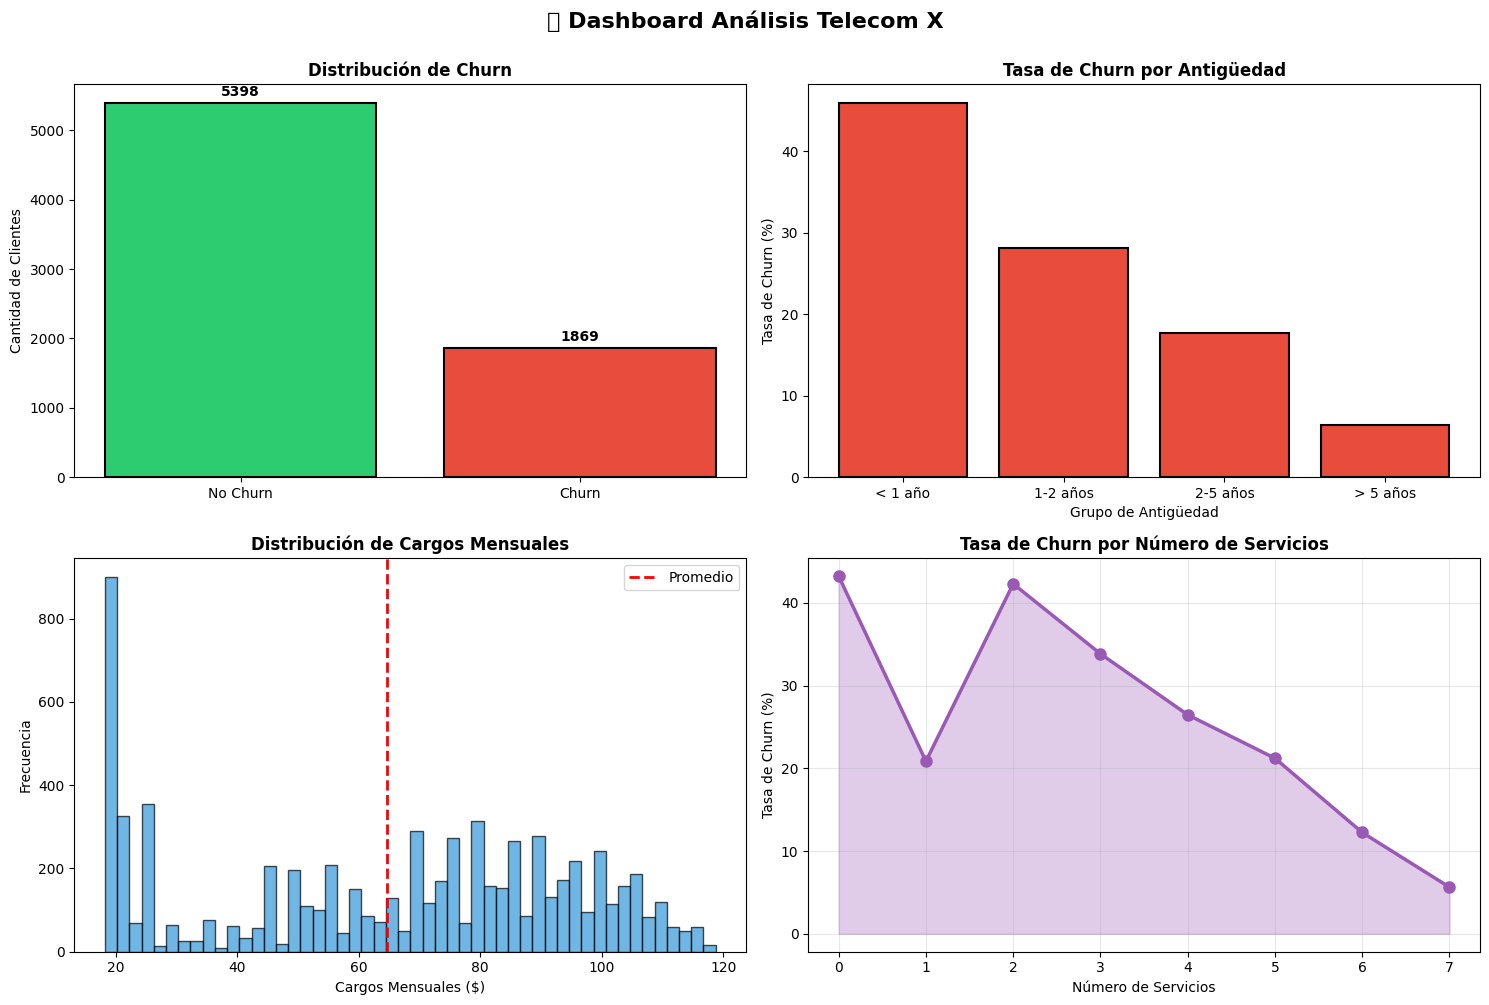

✅ Visualizaciones generadas


In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('📊 Dashboard Análisis Telecom X', fontsize=16, fontweight='bold', y=1.00)

# 1. Distribución de Churn
churn_counts = clientes['Churn'].value_counts()
colors = ['#2ecc71', '#e74c3c']
axes[0, 0].bar(['No Churn', 'Churn'], churn_counts.values, color=colors, edgecolor='black', linewidth=1.5)
axes[0, 0].set_title('Distribución de Churn', fontweight='bold', fontsize=12)
axes[0, 0].set_ylabel('Cantidad de Clientes')
for i, v in enumerate(churn_counts.values):
    axes[0, 0].text(i, v + 100, str(v), ha='center', fontweight='bold')

# 2. Churn vs Antigüedad (grupos)
tenure_bins = [0, 12, 24, 60, 100]
tenure_labels = ['< 1 año', '1-2 años', '2-5 años', '> 5 años']
clientes['TenureGroup'] = pd.cut(clientes['tenure'], bins=tenure_bins, labels=tenure_labels)
churn_tenure = clientes.groupby('TenureGroup')['Churn'].apply(lambda x: (x.sum() / len(x) * 100))
axes[0, 1].bar(churn_tenure.index, churn_tenure.values, color='#e74c3c', edgecolor='black', linewidth=1.5)
axes[0, 1].set_title('Tasa de Churn por Antigüedad', fontweight='bold', fontsize=12)
axes[0, 1].set_ylabel('Tasa de Churn (%)')
axes[0, 1].set_xlabel('Grupo de Antigüedad')

# 3. Distribución de Cargos Mensuales
axes[1, 0].hist(clientes['Charges.Monthly'], bins=50, color='#3498db', edgecolor='black', alpha=0.7)
axes[1, 0].axvline(clientes['Charges.Monthly'].mean(), color='red', linestyle='--', linewidth=2, label='Promedio')
axes[1, 0].set_title('Distribución de Cargos Mensuales', fontweight='bold', fontsize=12)
axes[1, 0].set_xlabel('Cargos Mensuales ($)')
axes[1, 0].set_ylabel('Frecuencia')
axes[1, 0].legend()

# 4. Churn por número de servicios
servicios_churn = clientes.groupby('NumServicios')['Churn'].apply(lambda x: (x.sum() / len(x) * 100))
axes[1, 1].plot(servicios_churn.index, servicios_churn.values, marker='o', linewidth=2.5, markersize=8, color='#9b59b6')
axes[1, 1].fill_between(servicios_churn.index, servicios_churn.values, alpha=0.3, color='#9b59b6')
axes[1, 1].set_title('Tasa de Churn por Número de Servicios', fontweight='bold', fontsize=12)
axes[1, 1].set_ylabel('Tasa de Churn (%)')
axes[1, 1].set_xlabel('Número de Servicios')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Visualizaciones generadas")

# Análisis por tipo de contrato

📋 ANÁLISIS POR TIPO DE CONTRATO
                Total Clientes  Tasa Churn %  Cargo Mensual Promedio  \
Contract                                                               
Month-to-month            4005         41.32                   66.34   
One year                  1519         10.93                   65.23   
Two year                  1743          2.75                   60.54   

                Antigüedad Promedio  
Contract                             
Month-to-month                18.00  
One year                      42.19  
Two year                      56.74  


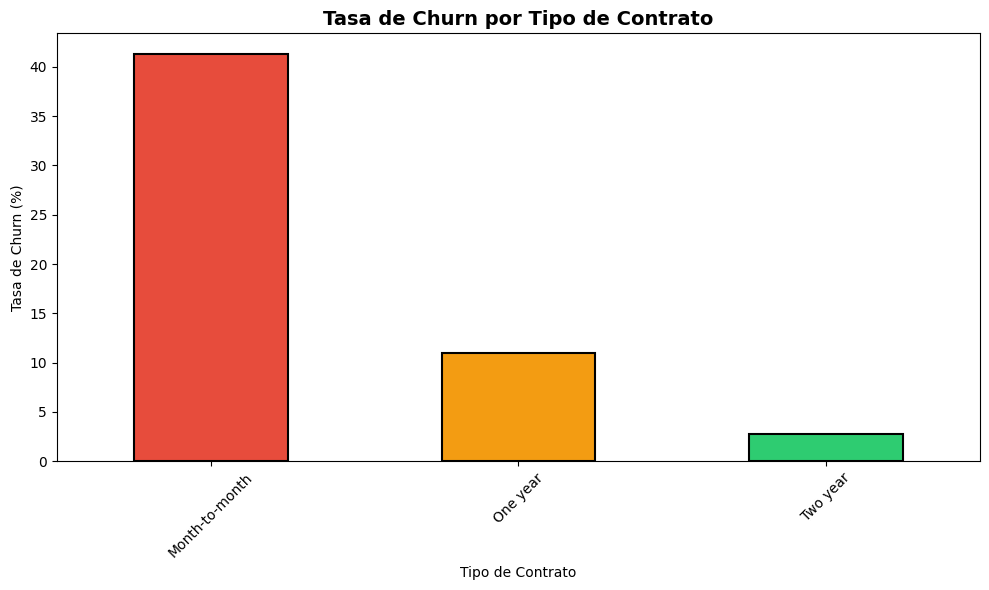

In [ ]:
print("="*70)
print("📋 ANÁLISIS POR TIPO DE CONTRATO")
print("="*70)

contrato_stats = clientes.groupby('Contract').agg({
    'customerID': 'count',
    'Churn': lambda x: (x.sum() / len(x) * 100),
    'Charges.Monthly': 'mean',
    'tenure': 'mean'
}).round(2)

contrato_stats.columns = ['Total Clientes', 'Tasa Churn %', 'Cargo Mensual Promedio', 'Antigüedad Promedio']
print(contrato_stats)

fig, ax = plt.subplots(figsize=(10, 6))
contrato_stats['Tasa Churn %'].plot(kind='bar', ax=ax, color=['#e74c3c', '#f39c12', '#2ecc71'], edgecolor='black', linewidth=1.5)
ax.set_title('Tasa de Churn por Tipo de Contrato', fontweight='bold', fontsize=14)
ax.set_ylabel('Tasa de Churn (%)')
ax.set_xlabel('Tipo de Contrato')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

# Exportar dataset limpio y resumen final

In [ ]:
# Eliminar columnas auxiliares
clientes_export = clientes.drop(columns=['TenureGroup'], errors='ignore')

# Exportar CSV
clientes_export.to_csv('telecom_clientes_limpio.csv', index=False)
print("✅ Archivo guardado: telecom_clientes_limpio.csv\n")

print("="*70)
print("✨ RESUMEN FINAL DEL DATASET")
print("="*70)

tasa_churn = clientes['Churn'].sum() / len(clientes) * 100

print(f"Total de clientes: {len(clientes):,}")
print(f"Clientes con Churn: {clientes['Churn'].sum():,} ({tasa_churn:.2f}%)")
print(f"Ingresos totales: ${clientes['Charges.Total'].sum():,.2f}")
print(f"Ingresos promedio: ${clientes['Charges.Total'].mean():,.2f}")
print(f"Antigüedad promedio: {clientes['tenure'].mean():.1f} meses")
print(f"Servicios promedio: {clientes['NumServicios'].mean():.2f}")
print(f"Número de variables: {len(clientes.columns)}")
print("="*70)
print("🎉 ¡Datos listos para modelado de Machine Learning!")
print("="*70)

✅ Archivo guardado: telecom_clientes_limpio.csv

✨ RESUMEN FINAL DEL DATASET
Total de clientes: 7,267
Clientes con Churn: 1,869 (25.72%)
Ingresos totales: $16,573,368.83
Ingresos promedio: $2,280.63
Antigüedad promedio: 32.3 meses
Servicios promedio: 2.94
Número de variables: 26
🎉 ¡Datos listos para modelado de Machine Learning!
